<a href="https://colab.research.google.com/github/Sans7349/CodersCave-Data_Science-CVIP_Project/blob/main/ADDITIONAL_TASK_2_EMPLOYEE_FEEDBACK_SURVEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/train_set.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,id,person_name,nine_box_category,feedback,adjusted,reviewed,label,feedback_len,num_of_sent,performance_class,potential_class,feedback_clean,data_type
0,1,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John has not progressed in his position. He is...,False,True,0,287,5,0,0,john ha not progressed in his position he is c...,train
1,10045,Douglas Henry,"Category 1: 'Risk' (Low performance, Low poten...",Douglas Henry has been having trouble in all a...,False,False,0,430,6,0,0,douglas henry ha been having trouble in all ar...,train
2,10044,Douglas Henry,"Category 1: 'Risk' (Low performance, Low poten...",Douglas has a lot to work on and areas to grow...,False,False,0,290,4,0,0,douglas ha a lot to work on and area to grow i...,train
3,10005,Freddie Davies,"Category 1: 'Risk' (Low performance, Low poten...","Freddie is a nice guy, but his performance and...",False,True,0,418,5,0,0,freddie is a nice guy but his performance and ...,train
4,10004,Freddie Davies,"Category 1: 'Risk' (Low performance, Low poten...",Freddie has been quite disappointing this quar...,False,False,0,449,4,0,0,freddie ha been quite disappointing this quart...,train


In [ ]:
# Display basic statistics of the dataset
data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()

# Display the unique values in categorical columns
unique_values = data[['nine_box_category', 'adjusted', 'reviewed', 'label', 'data_type']].nunique()

missing_values, unique_values


(id                   0
 person_name          0
 nine_box_category    0
 feedback             0
 adjusted             0
 reviewed             0
 label                0
 feedback_len         0
 num_of_sent          0
 performance_class    0
 potential_class      0
 feedback_clean       0
 data_type            0
 dtype: int64,
 nine_box_category    9
 adjusted             2
 reviewed             2
 label                9
 data_type            1
 dtype: int64)

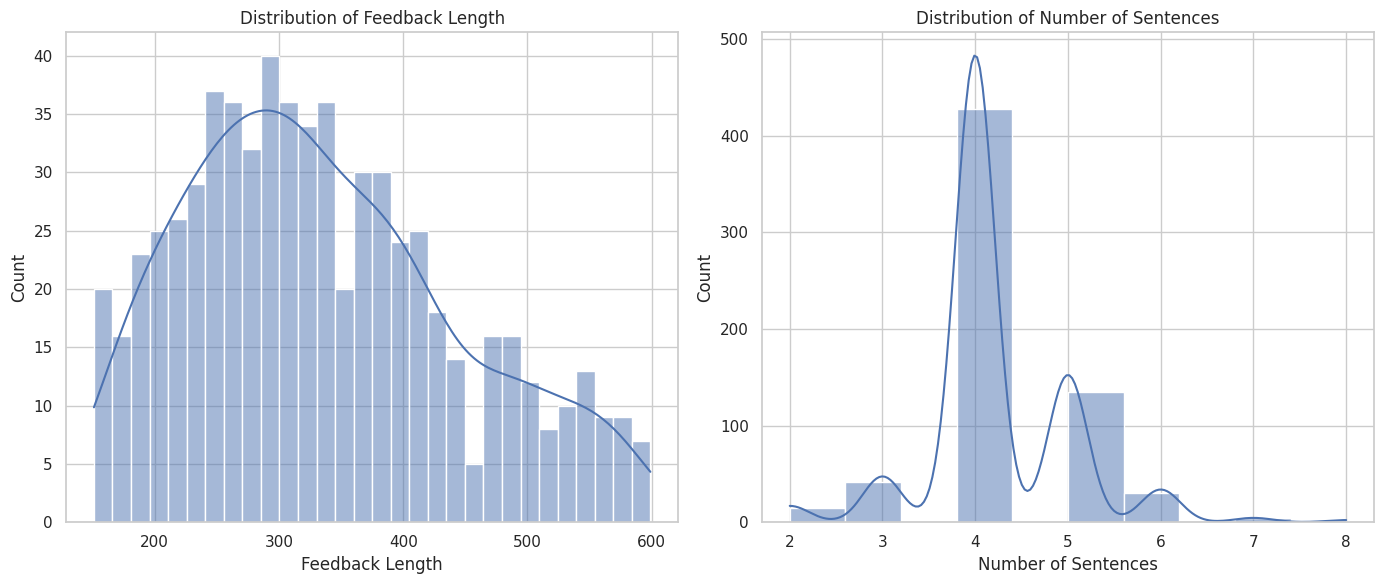

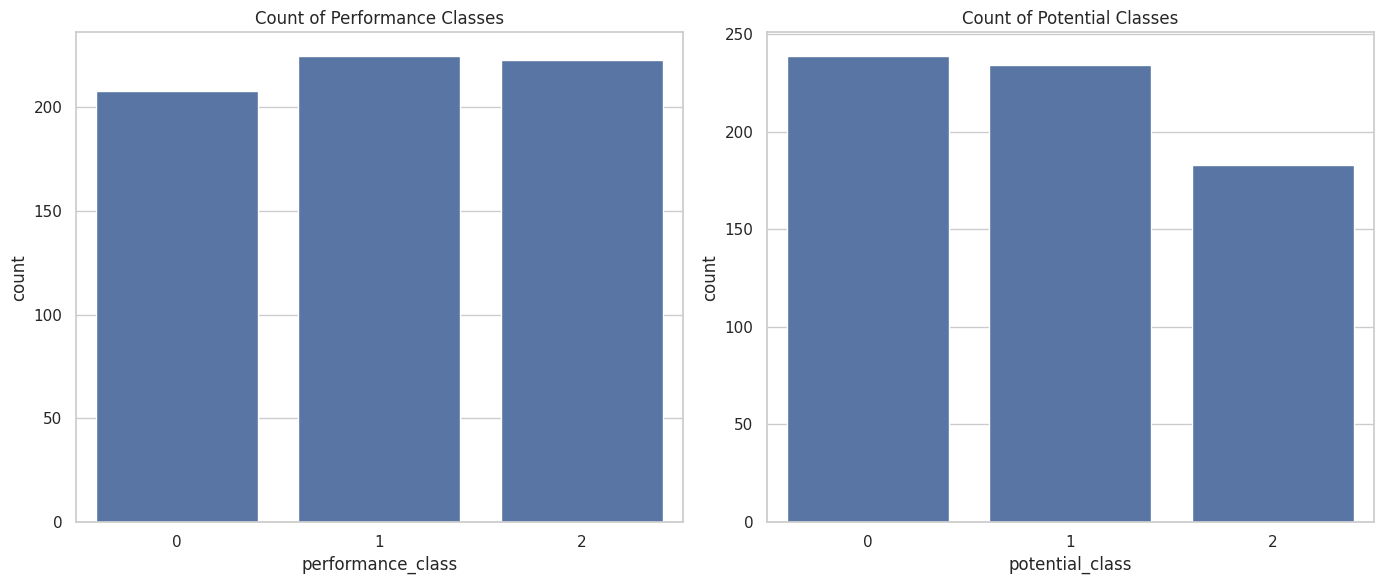

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualisation style
sns.set(style="whitegrid")

# Plotting histograms for feedback length and number of sentences
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data['feedback_len'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Feedback Length')
ax[0].set_xlabel('Feedback Length')

sns.histplot(data['num_of_sent'], bins=10, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Number of Sentences')
ax[1].set_xlabel('Number of Sentences')

plt.tight_layout()
plt.show()

# Count plots for performance_class and potential_class
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='performance_class', data=data, ax=ax[0])
ax[0].set_title('Count of Performance Classes')

sns.countplot(x='potential_class', data=data, ax=ax[1])
ax[1].set_title('Count of Potential Classes')

plt.tight_layout()
plt.show()


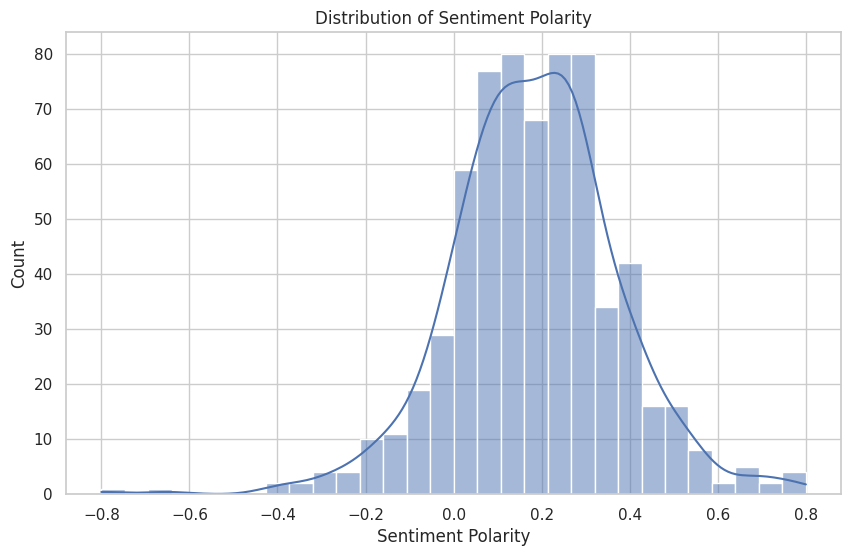

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
data['sentiment'] = data['feedback_clean'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.show()


In [ ]:
# Display sentiment statistics
print("\nSentiment Analysis Statistics:")
print(data['sentiment'].describe())


Sentiment Analysis Statistics:
count    656.000000
mean       0.182930
std        0.189596
min       -0.800000
25%        0.069687
50%        0.185670
75%        0.292054
max        0.800000
Name: sentiment, dtype: float64
